# Chronic Kidney Disease Analysis & Prediction

##### Importing Important Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as XGRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [7]:
df = pd.read_csv(r'C:\Users\Bora\Management Of RBR\RBR Builds - Documents\RBR Analytics\ML Test\Chronic_Kidney_Dsease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [10]:
df.shape # This tells you how many rows and columns there are.

(1659, 54)

In [12]:
df.describe() #Tells some useful statistical analysis of the data

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


### We want to predict given these variables if a patient has chronic kidney disease. We want to predict the diagnosis column

##### 0 = No Disease
##### 1 = Kidney Disease

In [14]:
# lets check for null values - (Null values can make it diffcult for model to be accurate)
df.isnull().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCal

In [16]:
# Let's see if there are any duplicates
df.duplicated().sum()

0

In [20]:
# lets drop feature (variables that are not really needed for the prediction)
df = df.drop(['PatientID', 'DoctorInCharge'], axis = 1)

In [21]:
df.shape

(1659, 52)

In [22]:
# Let's see how many patients either have kidney disease or do not. 
df['Diagnosis'].value_counts()

1    1524
0     135
Name: Diagnosis, dtype: int64

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

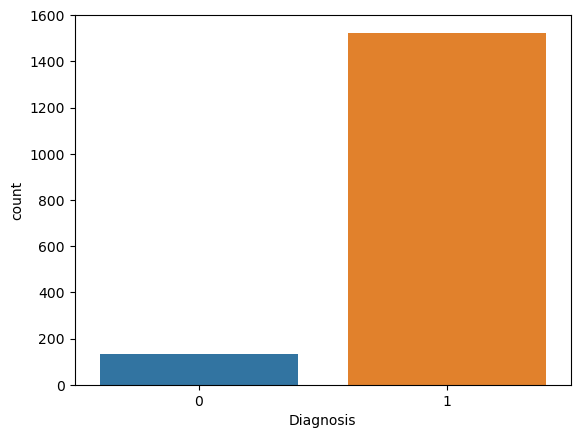

In [52]:
# Wow more people have kidney disease than don't..
#Lets create a visual visualize this. 
sns.countplot(x='Diagnosis', data=df,)




<AxesSubplot:xlabel='Age', ylabel='Count'>

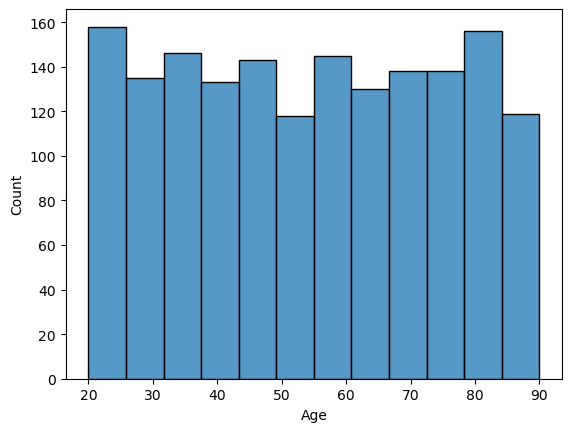

In [53]:
# Let's see the distribution of Age
sns.histplot(x = 'Age', data = df,)

In [55]:
# Now lets find some correlation of these variables for predicting if a patient has Chronic Kidney Disease. 
corr = df.corr()
corr

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
Age,1.000000,-0.037765,-0.006307,0.001448,0.008947,-0.033202,0.020215,-0.006030,0.003485,0.004062,...,0.001318,0.005683,-0.022676,0.043746,-0.014711,-0.038522,-0.015165,0.043168,0.010920,0.000919
Gender,-0.037765,1.000000,0.025707,0.004767,-0.022095,-0.023381,0.004054,-0.020473,0.014840,0.011517,...,-0.028158,0.001424,0.015554,0.013984,-0.000509,0.019628,0.020156,-0.026356,-0.014644,0.042239
Ethnicity,-0.006307,0.025707,1.000000,-0.047051,0.039696,-0.008506,0.019127,-0.033574,-0.057811,-0.012721,...,-0.004542,-0.031039,0.010930,0.008654,0.010036,-0.036629,0.023191,0.007489,0.012971,0.007199
SocioeconomicStatus,0.001448,0.004767,-0.047051,1.000000,-0.003711,-0.030242,0.021900,0.010864,-0.000259,-0.000394,...,-0.026640,-0.003762,-0.007924,0.036443,-0.013242,-0.005283,0.002820,0.009689,-0.022453,-0.034104
EducationLevel,0.008947,-0.022095,0.039696,-0.003711,1.000000,-0.016669,0.003070,0.046814,-0.003066,-0.013261,...,0.018786,0.004209,-0.016503,-0.047143,0.020611,-0.029415,0.022940,-0.005434,-0.000944,-0.037343
BMI,-0.033202,-0.023381,-0.008506,-0.030242,-0.016669,1.000000,-0.000968,-0.067239,0.003528,0.014539,...,-0.030355,0.023998,-0.046046,-0.032956,0.008763,0.006205,0.002934,0.020329,-0.015661,0.055222
Smoking,0.020215,0.004054,0.019127,0.021900,0.003070,-0.000968,1.000000,0.032707,0.006153,-0.006386,...,0.057832,-0.006464,0.017025,-0.015402,-0.009121,0.000686,0.033114,-0.043634,0.028563,0.026875
AlcoholConsumption,-0.006030,-0.020473,-0.033574,0.010864,0.046814,-0.067239,0.032707,1.000000,0.056835,-0.026931,...,-0.008730,0.018152,0.000959,-0.026421,0.030144,0.027446,0.022099,0.011002,-0.012806,-0.006245
PhysicalActivity,0.003485,0.014840,-0.057811,-0.000259,-0.003066,0.003528,0.006153,0.056835,1.000000,0.028995,...,0.035289,-0.011907,0.006563,-0.001012,0.001602,-0.003056,-0.017973,0.059385,0.007185,-0.021550
DietQuality,0.004062,0.011517,-0.012721,-0.000394,-0.013261,0.014539,-0.006386,-0.026931,0.028995,1.000000,...,0.040590,-0.041057,-0.008491,-0.012775,-0.000413,-0.027323,0.035851,-0.045941,-0.014740,-0.044503


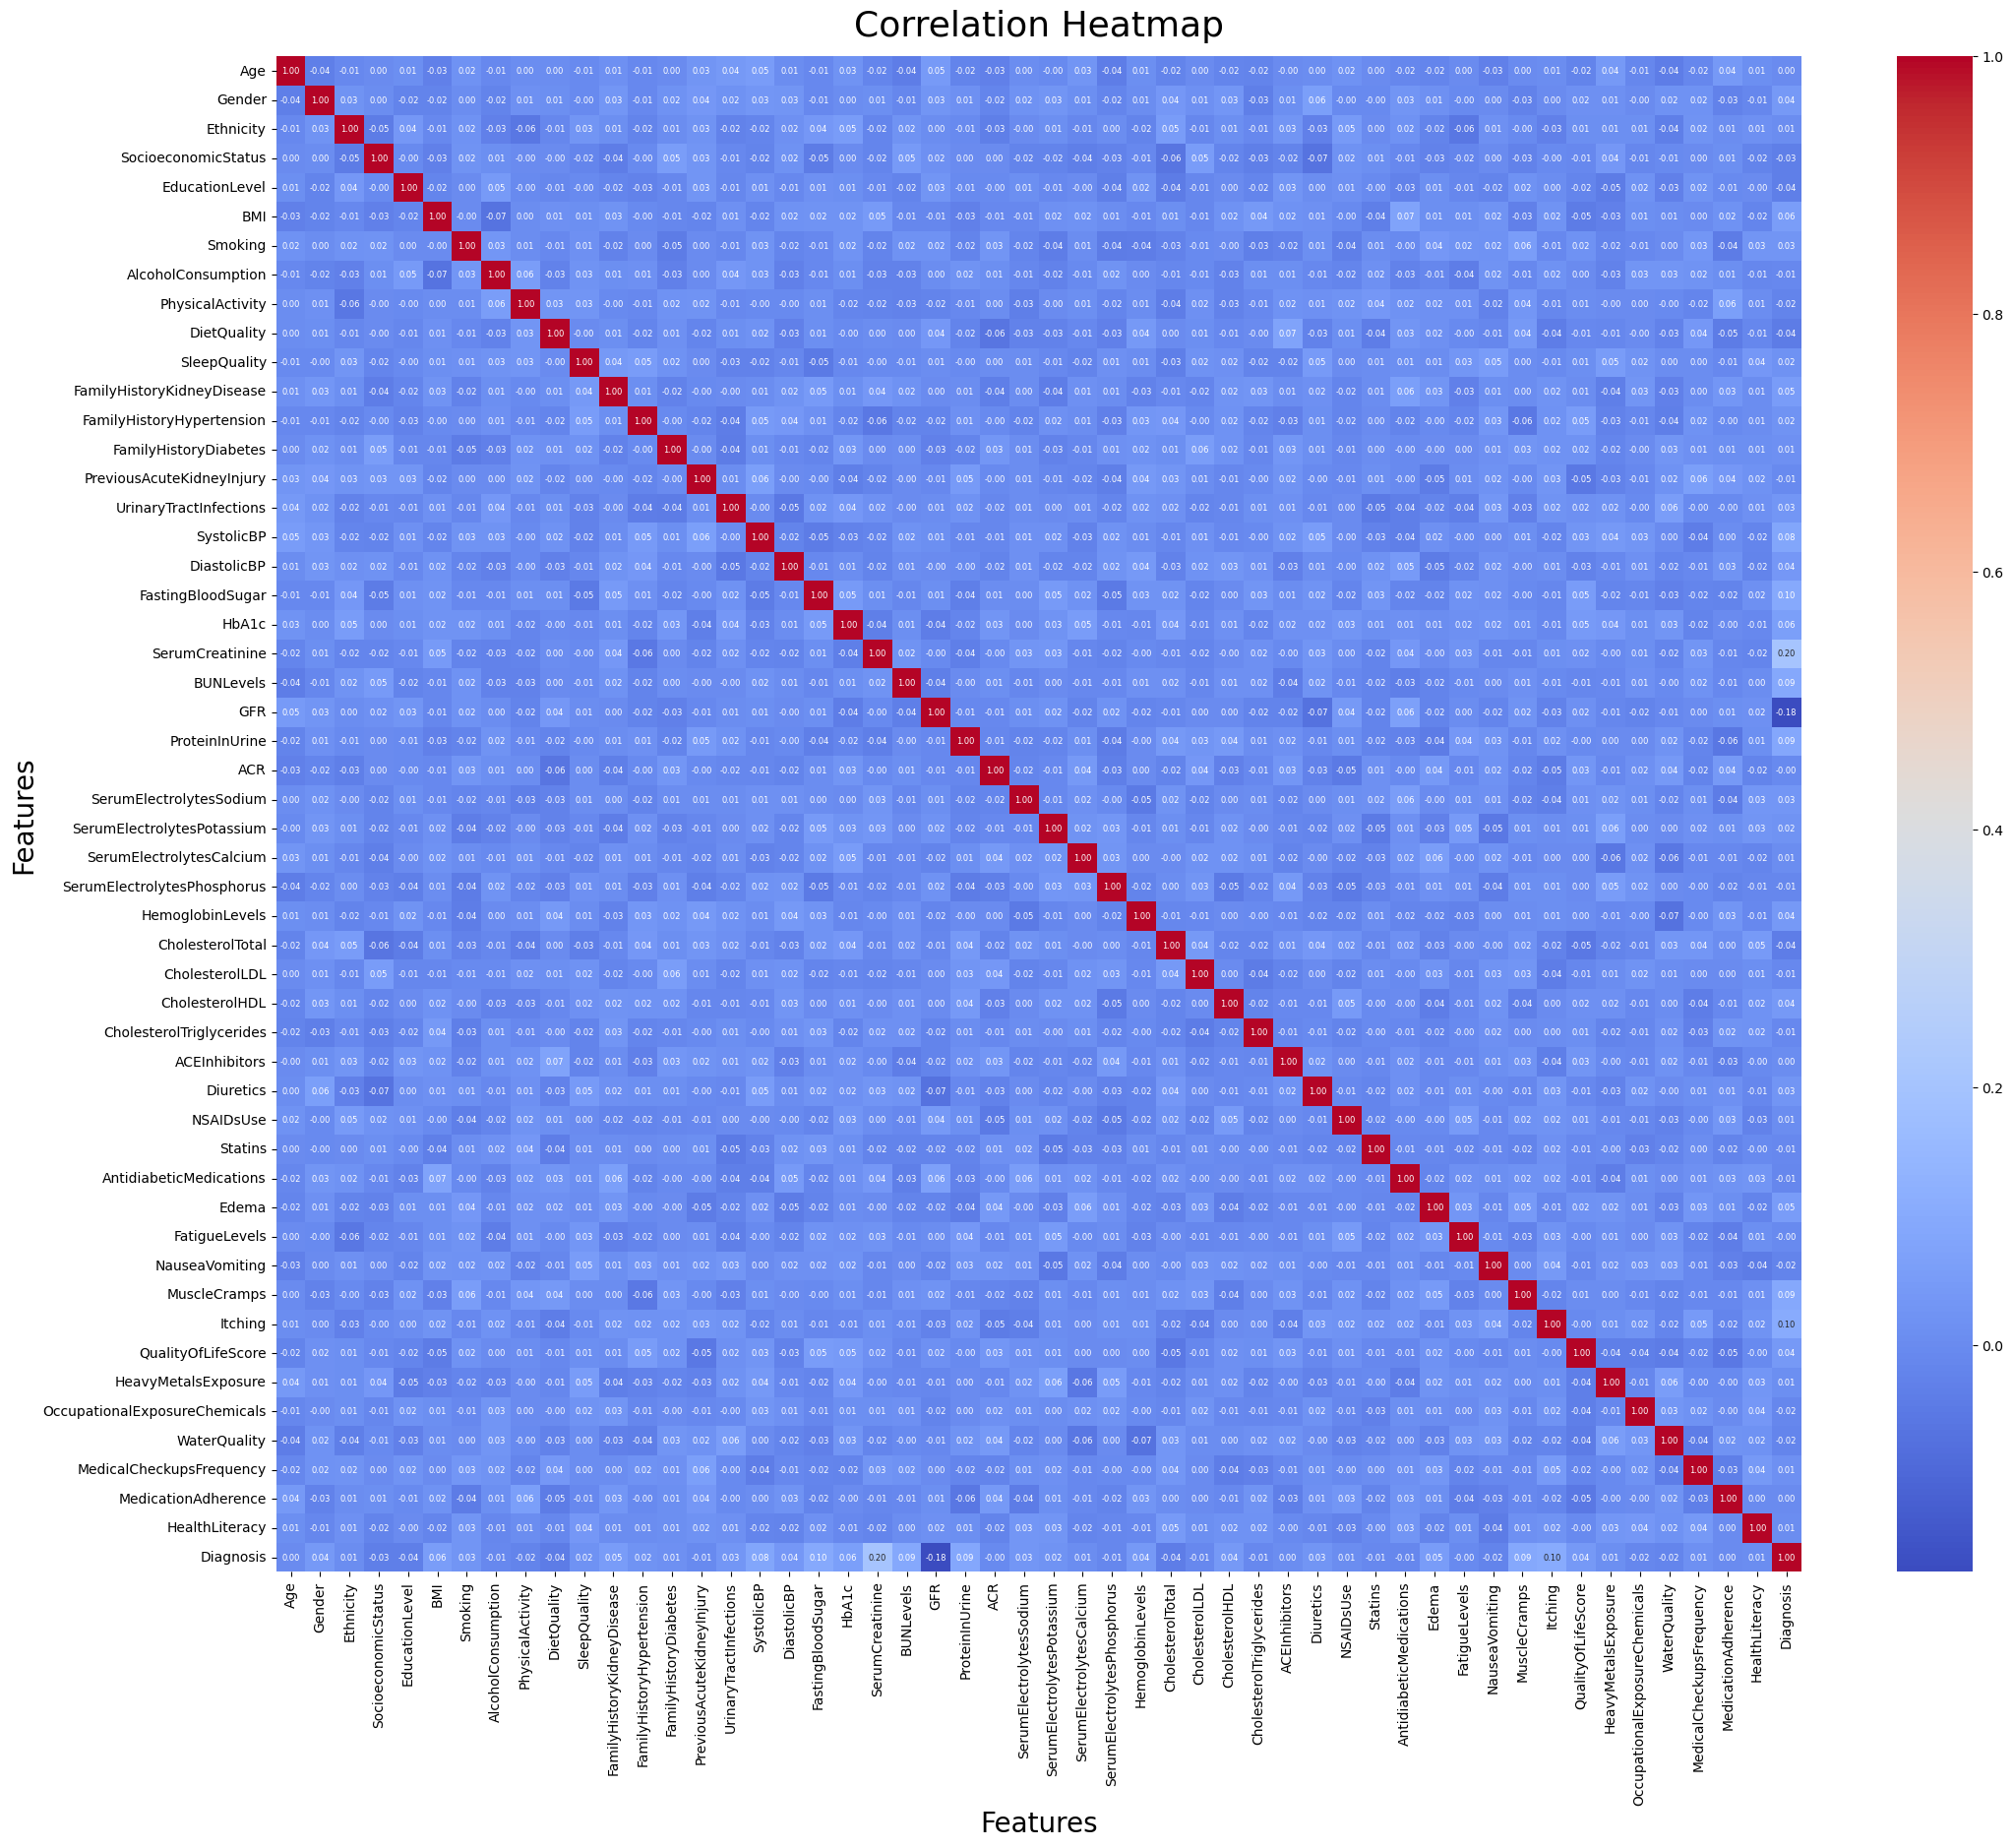

In [59]:
# yeah lets visualize this. 
plt.figure(figsize = (25, 20))
sns.heatmap(data = corr, cmap = 'coolwarm', annot = True, fmt = '.2f', annot_kws= {'fontsize':6})

# let's give it a title and some axis labels. 

plt.title('Correlation Heatmap', fontsize = 26, pad = 15)
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Features', fontsize = 20)
plt.show()

### Creating Predictor(Independent) an Predicted (Dependent) Variables

In [60]:
X = df.drop(['Diagnosis'], axis=1) # Drops the 'Diagnosis column (Our Predicter variables)
Y = df['Diagnosis'] # Creates a seperate dataframe for just the 'Diagnosis' column (Our Predicted Variable).

In [61]:
# Let's see the shape of them
X.shape, Y.shape

((1659, 51), (1659,))

## Let's now normalize the data

In [63]:
scaler = StandardScaler()
scaler.fit(X)



StandardScaler()

In [65]:
standardized_data = scaler.transform(X)
standardized_data # We just created a new dataframe called standardized_data - This dataframe has the predictor variable normalize. 

array([[ 0.80603205, -1.0312288 , -0.7129886 , ..., -0.86000116,
         0.00662916,  1.6296711 ],
       [-0.99501871, -1.0312288 , -0.7129886 , ...,  1.68511065,
         1.12979462,  0.6953825 ],
       [ 1.24412548,  0.96971691,  0.28688299, ..., -0.49981077,
         0.93278215,  0.76188226],
       ...,
       [ 1.43883367, -1.0312288 , -0.7129886 , ..., -1.05002141,
         0.28609362, -0.0723607 ],
       [ 1.73089595, -1.0312288 , -0.7129886 , ..., -1.2617621 ,
        -0.76793191, -1.66273877],
       [-0.99501871,  0.96971691,  0.28688299, ..., -0.21509302,
        -1.65954412, -0.20390035]])

In [66]:
# Now let's make our data frame X be the standardize_data
X = standardized_data
Y = df['Diagnosis']


## Lets now split the data into training and test 

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, stratify= Y, random_state= 2)

In [70]:
X.shape, x_train.shape, x_test.shape

((1659, 51), (1327, 51), (332, 51))

In [71]:
# We split the data into training and test 20% was used for testing and the other 80 for testing. 
# We will use logistic regression as the model. 

model = LogisticRegression()

In [72]:
model.fit(x_train, y_train)

LogisticRegression()

In [73]:
x_train_prediction = model.predict(x_train)


In [76]:
# Let's check the accuracy of it
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy score of the training data: ', training_data_accuracy)

Accuracy score of the training data:  0.9299171062547099


In [78]:
# Let's now do the same for the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Accuracy score of test data: ", test_data_accuracy)

Accuracy score of test data:  0.9186746987951807


In [80]:
# Not bad accuracy scores!

## let's now create a Prediction Function

In [85]:
input_data = (71,0,0,0,2,31.069413751496626,1,5.128111860165678,1.676219707554013,0.2403855590585835,4.07643366,0,0,0,0,0,113,83,72.51078814507137,9.212396779947902,4.962530972901806,25.60594901833181,45.70320383652218,0.7449795078548022,123.84942593486639,137.65250064956632,3.626057706,10.314419701061095,3.1526483179421385,16.114678502827566,207.7286696841286,85.86365584750823,21.967957262270723,212.09521475233882,0,0,4.563139265,1,0,0,3.563893932541987,6.992243742388448,4.518513249801526,7.556302263012027,76.07679981465142,0,0,1,1.0188237954938262,4.966807653030387,9.871448837720148
)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)

print(prediction)

if (prediction[0] == 0):
    print('Patient has Chronic Kidney Disease')
if (prediction[0] == 1):
    print('Patient DOES NOT have Chronic Kidney Disease')

[[ 0.80603205 -1.0312288  -0.7129886  -1.25918547  0.33703081  0.47339294
   1.55357016 -0.83520563 -1.16842866 -1.67131039 -1.68221049 -0.40522898
  -0.65681534 -0.58871972 -0.34340141 -0.51615135 -0.83044964 -0.36390292
  -1.64200641  1.28516098  1.67784149 -0.15402744 -0.70322066 -1.20665633
  -0.29982674 -0.79748944 -1.50616197  1.4360517  -0.61217509  0.93570826
  -0.37849238 -0.91904643 -1.6741434  -0.12672446 -0.64742697 -0.68325947
  -0.15635554  1.27475488 -0.50395263 -0.50301208 -0.50175584  1.76770633
   0.49024627  0.86867618  0.94704867 -0.21454077 -0.33899757  2.01826522
  -0.86000116  0.00662916  1.6296711 ]]
[1]
Patient DOES NOT have Chronic Kidney Disease


c:\Users\Bora\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Yes!! We just analyzed and created a predictive system for the Chronic Kidney Disease dataset made available on kaggl.com 